                            
                            Exploratory Data Analysis (EDA) on Airbnb Listings


                                       Data Exploration

IMPORT THE NECESSARY LIBRARIES

In [184]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import missingno as msno

Load and examine the dataset to get a sense of its structure. Look at
the first 100 rows

In [166]:
listing_df = pd.read_csv("C:\\Users\\MBG Traders\\Desktop\\Data Science Intership\\Coding Samurai internship\\Tasks\\listings.csv")
listing_df.head(100)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2650482,https://www.airbnb.com/rooms/2650482,20160104002432,2016-01-04,Modern family home in Old Ballard,"Modern and bright, a fifth floor 2 bedroom per...",This well-designed two bedroom has light strea...,"Modern and bright, a fifth floor 2 bedroom per...",none,Ballard's southern border is a canal which car...,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.64
96,20927,https://www.airbnb.com/rooms/20927,20160104002432,2016-01-04,Cottage in the Heart of Ballard,A cozy cottage behind a lovely Victorian hous...,A cozy cottage behind a lovely Victorian house...,A cozy cottage behind a lovely Victorian hous...,none,Ballard is a fantastic destination neighborhoo...,...,10.0,f,NaN,WASHINGTON,t,moderate,f,f,2,3.64
97,4395578,https://www.airbnb.com/rooms/4395578,20160104002432,2016-01-04,Ballard Townhome - Pet Friendly!,This popular Northwest neighborhood has much t...,Great location- Walk Score 95! The Northweste...,This popular Northwest neighborhood has much t...,none,"Just four blocks from NW Market Street, the ma...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,31,0.11
98,4995903,https://www.airbnb.com/rooms/4995903,20160104002432,2016-01-04,Ballard Cottage with Loft,Brand new 350 sq ft cottage with a lofted slee...,NaN,Brand new 350 sq ft cottage with a lofted slee...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


Look at data types.

In [167]:
info_listing_df = listing_df.info
print(info_listing_df)
listing_df.dtypes

<bound method DataFrame.info of             id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                                    ...             ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                 name  \
0      2016-01-04         Stylish

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

Look at the  basic statistics.

In [168]:
basic_stats = listing_df.describe()
print(basic_stats)

                 id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  

                                    Data Cleaning

Checking how many missing values are there in dataset

In [169]:
#Total number of missing values
missing_values = listing_df.isnull().sum()
print(" The Total Number of missing values",missing_values)

 The Total Number of missing values id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64


Calculating percentage of missing values

In [170]:
percentage_missing = (listing_df.isnull().sum().sum() / (listing_df.shape[0] * listing_df.shape[1])) * 100 
print("Percentage of missing data: {:.2f}%".format(percentage_missing)) 

Percentage of missing data: 8.49%


Checking if there is any duplicate Values, as there is no duplicate values

In [171]:
#Total number of duplicated values
duplicate_values= listing_df.duplicated().sum()
print("The Total Number of Duplicate Values", duplicate_values)

The Total Number of Duplicate Values 0


Checking total number of rows and columns

In [172]:
num_rows, num_columns = listing_df.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 3818
Number of columns: 92


Checking by dropping Columns which contains missing values, if it doesnt effect on a dataset then clean data using droping columns but as half of the data set removing then we won't use it

In [173]:
data_without_empty_columns = listing_df.dropna(axis=1) 
num_columns_left = data_without_empty_columns.shape[1]
print("Number of columns after removing empty values:", num_columns_left) 


Number of columns after removing empty values: 46


Filling column of reviews per month by taking mean of other columns

In [174]:
column_name = 'reviews_per_month'
listing_df[column_name].fillna(listing_df[column_name].mean(), inplace=True)

# Identify categorical and numerical columns
categorical_cols = listing_df.select_dtypes(include=['object']).columns
numerical_cols = listing_df.select_dtypes(include=['number']).columns

# Drop rows with null values in categorical columns
listing_df.dropna(subset=categorical_cols, inplace=True)

# Fill null values in numerical columns with the mean value
listing_df[numerical_cols] = listing_df[numerical_cols].fillna(listing_df[numerical_cols].mean())

Drop license and scrape id column as the entire column is null.

In [175]:
listing_df.drop(['license'],axis=1,inplace=True)
# Reset Index after dropping rows 
listing_df.reset_index(drop=True,inplace=True)


listing_df.drop(['scrape_id'],axis=1,inplace=True)
# Reset Index after dropping rows 
listing_df.reset_index(drop=True,inplace=True)

Now it shows 0 missing values 


In [176]:
#Total number of missing values
missing_values = listing_df.isnull().sum()
print(" The Total Number of missing values",missing_values)

 The Total Number of missing values id                                  0
listing_url                         0
last_scraped                        0
name                                0
summary                             0
                                   ..
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 90, dtype: int64


<Axes: >

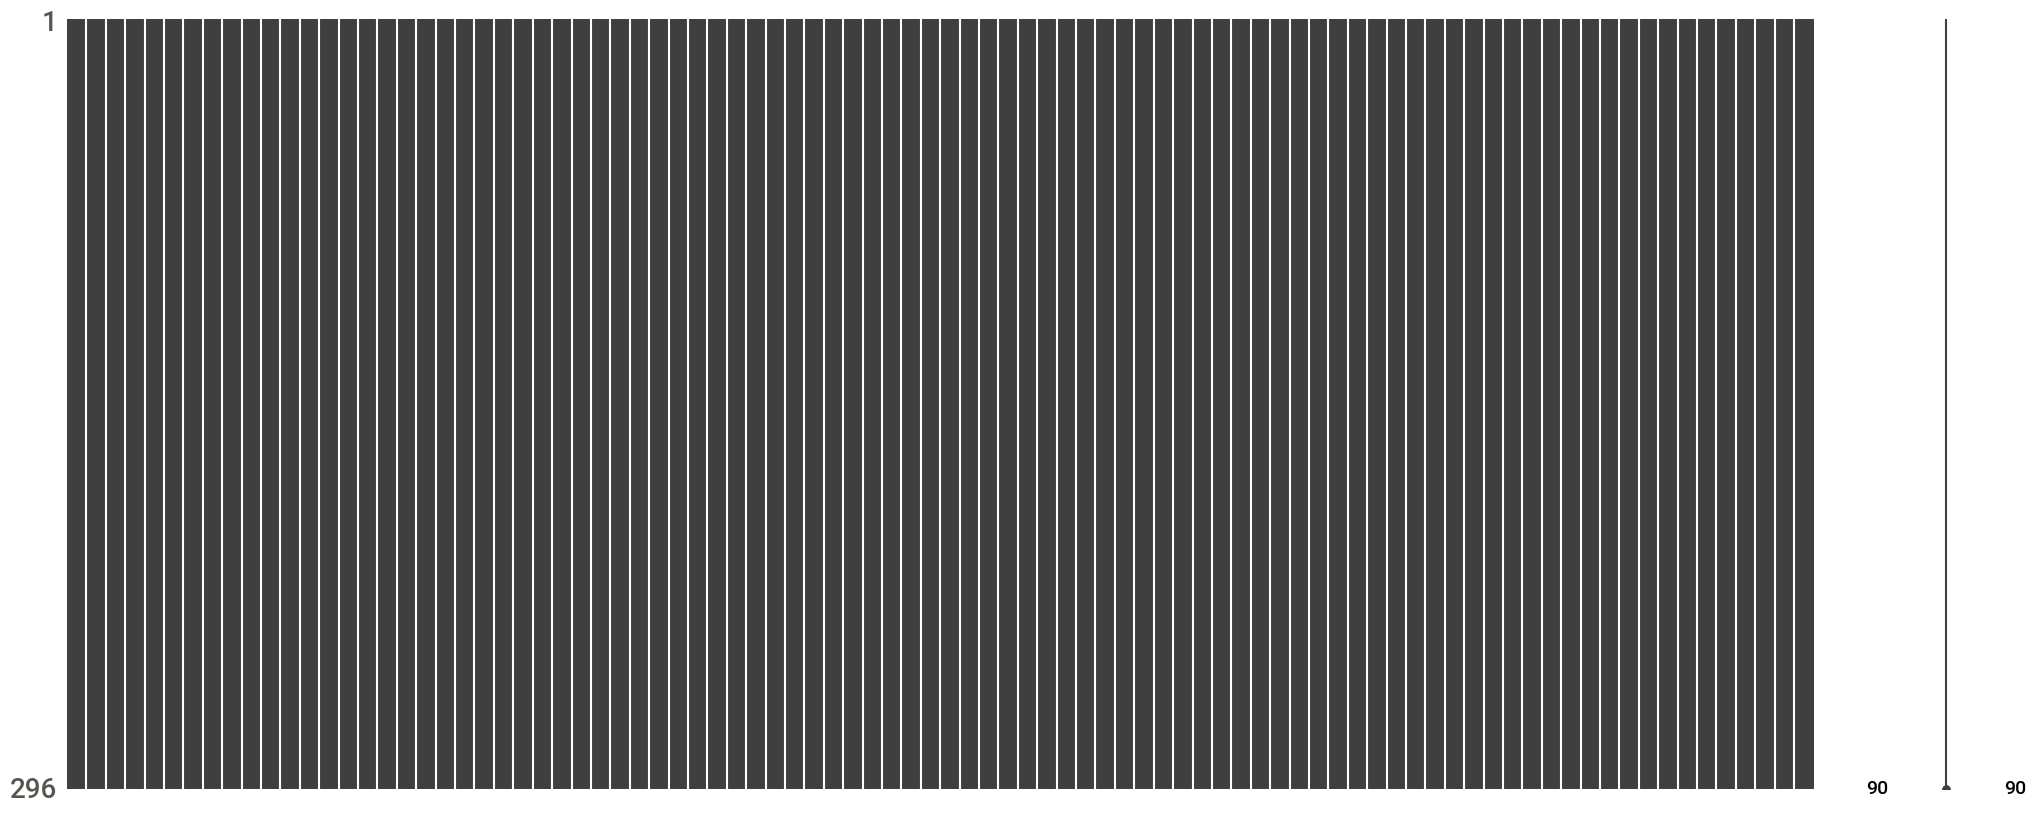

In [177]:

msno.matrix(listing_df)

Correcting unformatted data as are data is cleaned so we have to move further on Stats

In [178]:
# Convert the 'price' column to string
listing_df['price'] = listing_df['price'].astype(str)

# Clean the 'price' column by removing non-numeric characters and converting to float
listing_df['price'] = listing_df['price'].str.replace('$', '').str.replace(',', '').astype(float)


                                        Basic Statistics

Calculating Average Price of Listing

In [179]:

average_price = listing_df['price'].mean()
print("Average Price of Listings: ${:.2f}".format(average_price))

Average Price of Listings: $114.75


Plot a histogram to visualize the distribution of property types it shows types of houses

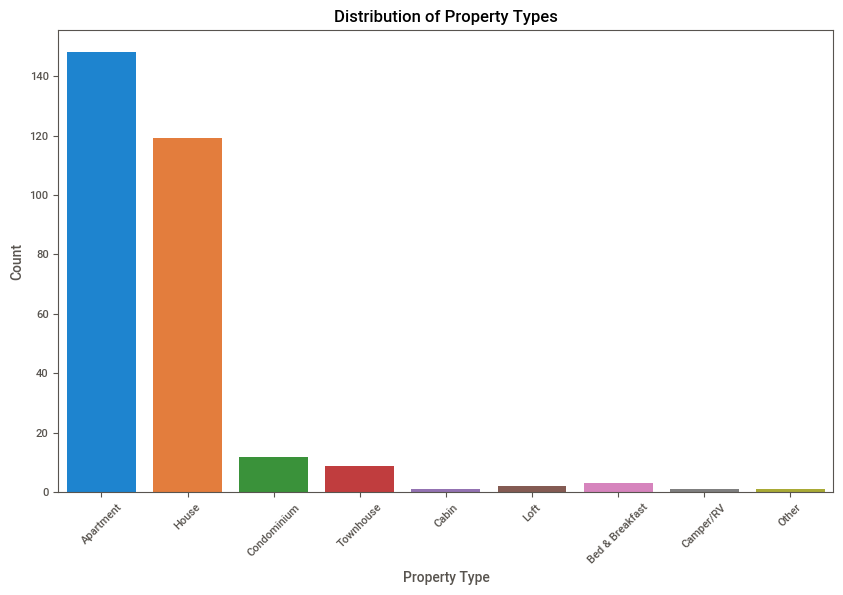

In [180]:

plt.figure(figsize=(10, 6))
sns.countplot(data=listing_df, x='property_type')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Plot a histogram to visualize the distribution of neighborhoods it shows how many houses are there in several cities or neighbhood

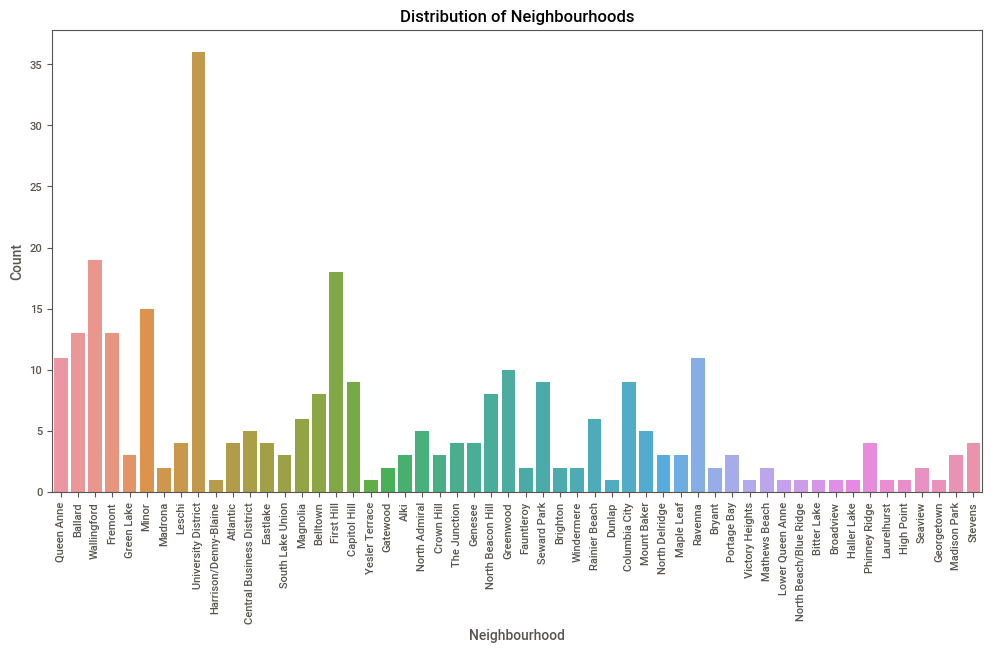

In [181]:

plt.figure(figsize=(12, 6))
sns.countplot(data=listing_df, x='neighbourhood')
plt.title('Distribution of Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Create a scatter plot to visualize the correlation using seaborn it shows how number of bedrooms effecting on the price

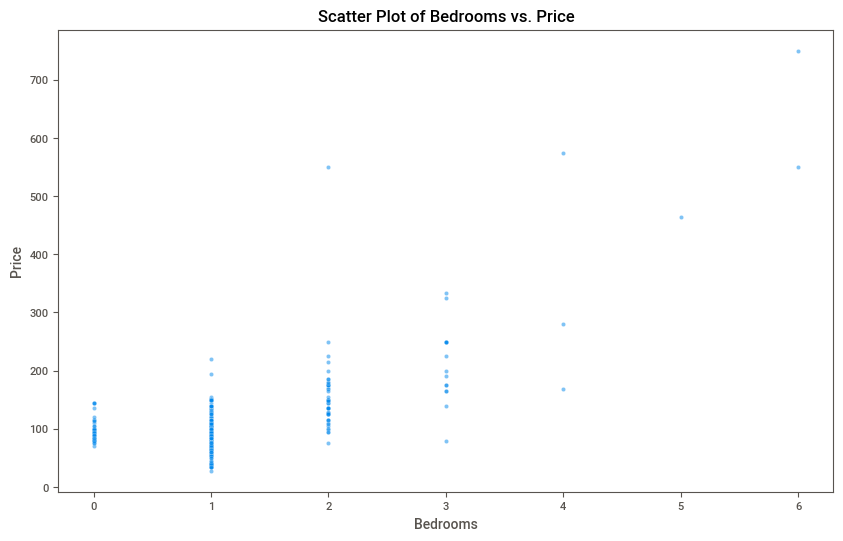

In [182]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data= listing_df, alpha=0.5)
plt.title('Scatter Plot of Bedrooms vs. Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


For finding correlations between different features

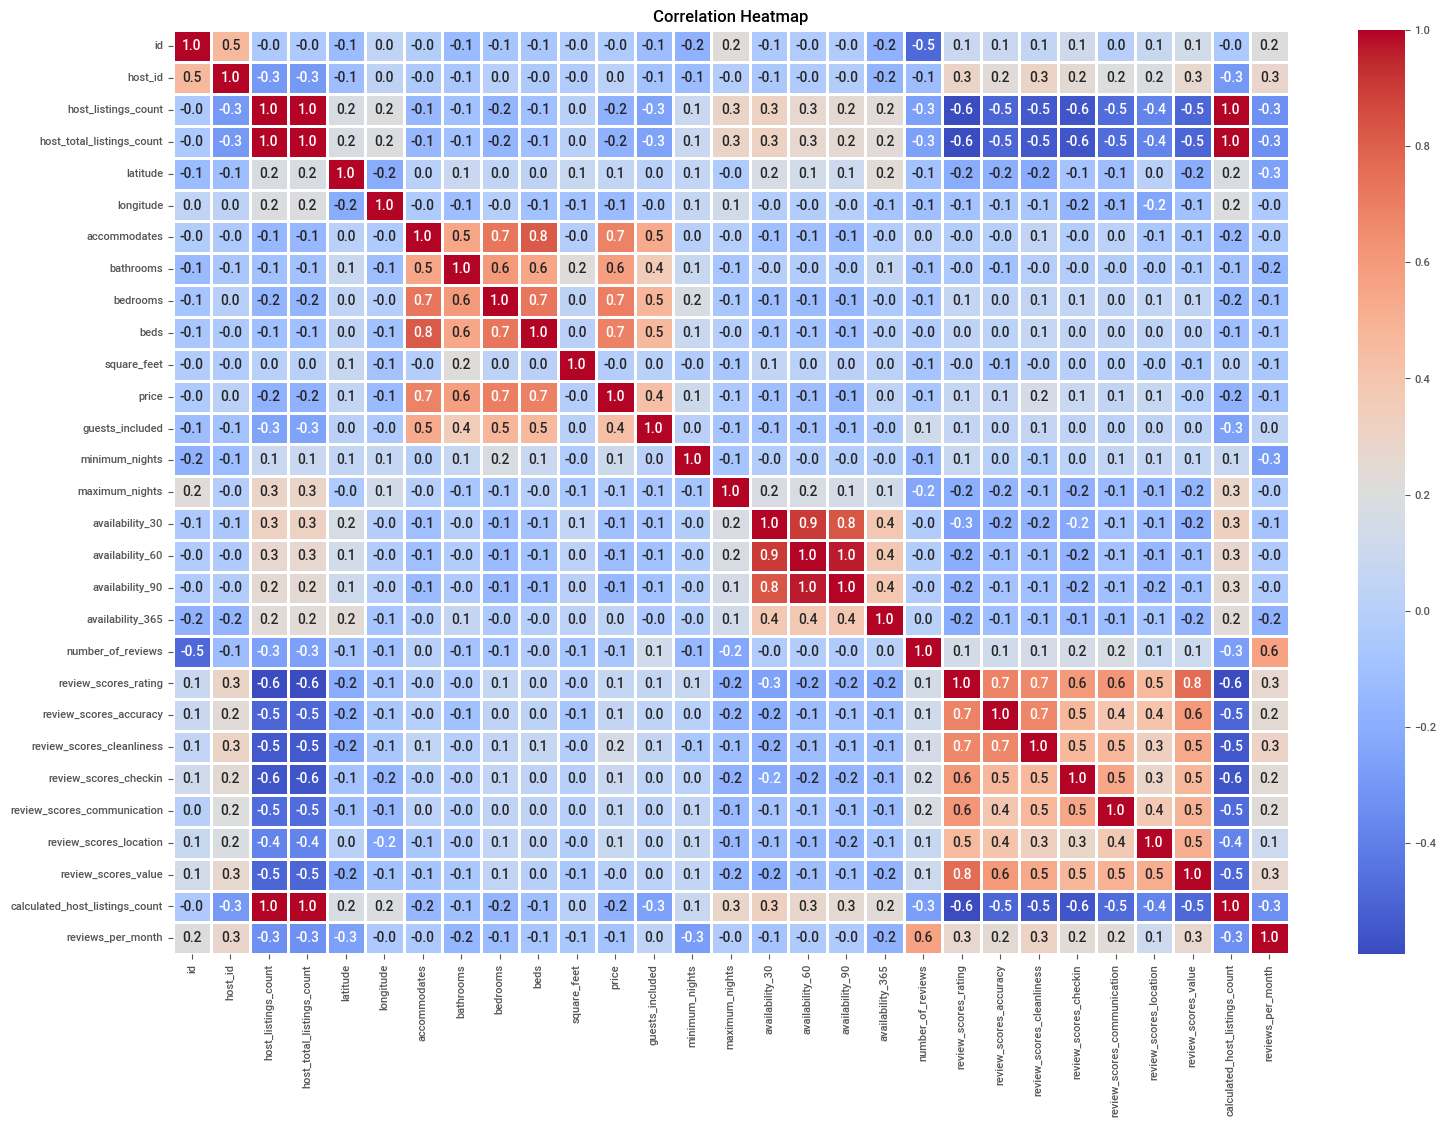

                                      id   host_id  host_listings_count  \
id                              1.000000  0.460283            -0.045713   
host_id                         0.460283  1.000000            -0.294504   
host_listings_count            -0.045713 -0.294504             1.000000   
host_total_listings_count      -0.045713 -0.294504             1.000000   
latitude                       -0.131168 -0.117202             0.172336   
longitude                       0.046161  0.031930             0.192096   
accommodates                   -0.016853 -0.041679            -0.146710   
bathrooms                      -0.132296 -0.065972            -0.094836   
bedrooms                       -0.077975  0.002410            -0.165001   
beds                           -0.062861 -0.039742            -0.105179   
square_feet                    -0.022199 -0.026437             0.009357   
price                          -0.036171  0.021214            -0.176264   
guests_included          

In [183]:

numeric_columns = listing_df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=1)
plt.title('Correlation Heatmap')
plt.show()


print(correlation_matrix)


                                         DATA INSIGHTS

1. Popular Neighborhoods:

University District neighborhoods tend to be more popular than others.
Factors contributing to this popularity include proximity to tourist attractions, safety, access to public transportation, and the availability of amenities.

2. Listing Prices:

Listing prices exhibit significant variation due to multiple factors:
Property type: Different types of properties (e.g., apartments, houses) have varying price ranges.
Number of bedrooms: Larger properties with more bedrooms often come with higher price tags.
Amenities: Well-equipped properties with additional amenities can command higher prices.
Location: Properties located in desirable neighborhoods or close to major attractions tend to have higher listing prices.
Seasonality: Prices can fluctuate seasonally, with peak tourist seasons generally associated with higher prices.

3. Correlation Insights:

Correlation analysis can provide insights into relationships between different features:
Positive correlation between the number of bedrooms and price suggests that larger properties tend to be more expensive.
Positive correlations between amenities, location, and price indicate that well-equipped properties in desirable neighborhoods can command higher prices.

4. Average House Price:

Determining the average house price in the dataset can provide a key summary statistic that offers a quick overview of the property market's central tendency.

These insights are derived from analyzing the dataset and can be valuable for various purposes, including pricing strategies, marketing decisions, and understanding traveler preferences. They provide a basis for data-driven decision-making in the real estate or hospitality industry.